In [ ]:
# autograd is auto-differentiability tool of pytorch

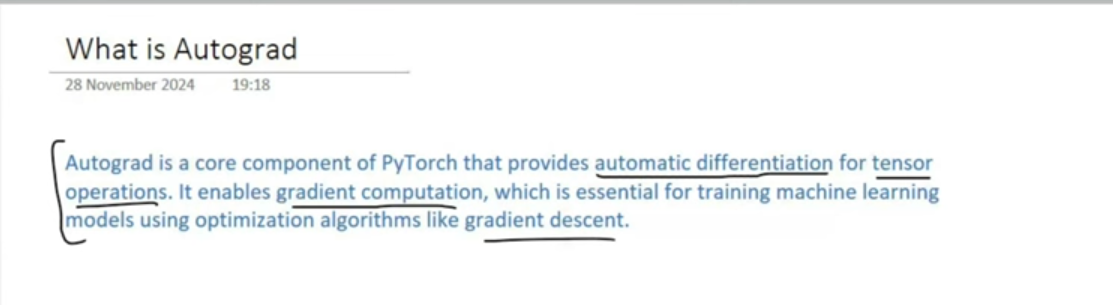

In [ ]:
# you have to set the require_grad=True while defining a var say x for which you'll be differentiating
# in the computation map of pytorch it will save the operation while computing derived variable say x from the defined variable x
# when you'll do y.backward() it will differentiate till x
# x.grad will now store the gradient in terms of y

In [40]:
import torch
import numpy as np

In [ ]:
x= torch.tensor(3.0,requires_grad=True)
y=x**2

In [ ]:
print(x),y

tensor(3., requires_grad=True)


(None, tensor(9., grad_fn=<PowBackward0>))

In [ ]:
y.backward()
print(x.grad)

tensor(6.)


In [ ]:
y.backward()
print(x.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

THE ERROR ARISES BECAUSE ONCE THE COMPUTATION OF DERIVATIVE IS DONE THE COMPUTATION GRAPH IS FREED, AND NO LONGER THERE

DEMONSTRATION FOR LOSS BACK PROPOGATION

In [ ]:
def loss2(a,b):
  return 0.5*((a-b)**2)

In [ ]:
x= torch.tensor(3.0)
y=torch.tensor(4.0)

In [ ]:
w=torch.tensor(5.0,requires_grad=True)
b=torch.tensor(3.0,requires_grad=True)

In [ ]:
y_pred = w*x+b

In [ ]:
loss = loss(y_pred,y)

In [ ]:
loss.backward()

In [ ]:
w.grad,b.grad

(tensor(42.), tensor(14.))

THERE ARE WAYS TO DETACH THE COMPUTATION GRAPH CREATION
* using requires_grad = False
* z=x.detach() # copies data not the grad
* with torch.no_grad() loop

In [ ]:
x=torch.tensor(2.0,requires_grad=True)
with torch.no_grad():
  y=x**2

In [ ]:
y

tensor(4.)

In [63]:
class Model():
  # initalzation
  def __init__(self,x,y):
    self.x= x
    self.y=y
    self.w = torch.rand(x.shape[0],requires_grad=True)
    self.b = torch.rand(1,requires_grad=True)
  # forward pass
  def fp(self):
    self.y_pred = (self.x*self.w)+self.b
    self.y_pred = torch.sigmoid(self.y_pred)
    return self.y_pred

  # compute loss
  def loss(self):
    l= torch.nn.BCELoss()
    return l(self.y_pred,self.y)



In [93]:
x = torch.rand(100)
y = torch.randint(0, 2, (x.shape[0],),dtype=torch.float32)
y


tensor([0., 1., 1., 0., 1., 0., 0., 0., 0., 0.])

In [99]:
for epoch in range(50):
  obj=Model(x,y)
  obj.fp()
  a=obj.loss()
  a.backward()


  with torch.no_grad():
    obj.w-= obj.w.grad
    obj.b-= obj.b.grad
  obj.w.grad.zero_()
  obj.b.grad.zero_()
  print(f'loss after epoch {epoch} is {a}')

loss after epoch 0 is 0.7754485607147217
loss after epoch 1 is 1.070695161819458
loss after epoch 2 is 0.9157782793045044
loss after epoch 3 is 0.9762995839118958
loss after epoch 4 is 0.9559212923049927
loss after epoch 5 is 1.0031734704971313
loss after epoch 6 is 0.9206956028938293
loss after epoch 7 is 0.8991239666938782
loss after epoch 8 is 0.9473159909248352
loss after epoch 9 is 1.1402539014816284
loss after epoch 10 is 0.9378557205200195
loss after epoch 11 is 0.7824838757514954
loss after epoch 12 is 0.8821638226509094
loss after epoch 13 is 0.8006264567375183
loss after epoch 14 is 0.8728322982788086
loss after epoch 15 is 0.7917400002479553
loss after epoch 16 is 0.7621480822563171
loss after epoch 17 is 0.7936090230941772
loss after epoch 18 is 0.8435724973678589
loss after epoch 19 is 0.8648703694343567
loss after epoch 20 is 1.0018819570541382
loss after epoch 21 is 1.045985221862793
loss after epoch 22 is 0.9629780650138855
loss after epoch 23 is 0.8631485104560852
loss